In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import pandas as pd
%matplotlib inline

# Data

Data from https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_Wuhan_coronavirus_outbreak

In [6]:
# Mainland China data

dates = pd.date_range('2020-01-10','2020-01-27')
#Missing data from the 14
dates = dates[dates!='2020-01-14']

confirmed_cases = [41,
                   41,
                   41,
                   41,
                   np.NaN,
                   45,
                   62,
                   121,
                   198,
                   291,
                   440,
                   571,
                   830,
                   1287,
                   1975,
                   2744,
                   4515]

deaths = [1,
          1,
          1,
          1,
          2,
          np.NaN,
          2,
          np.NaN,
          3,
          6,
          9,
          17,
          25,
          41,
          56,
          80,
          106]

recovered = [np.NaN,
             np.NaN, 
             np.NaN,
             np.NaN,
             7,
             12,
             15,
             19,
             25,
             25,
             np.NaN, 
             np.NaN,
             34,
             38,
             49,
             51,
             60]

In [10]:
df = pd.DataFrame({'dates':dates, 'I':confirmed_cases, 'Rd':deaths, 'Rr':recovered})
df['R'] = df.Rd + df.Rr
df = df.set_index('dates')

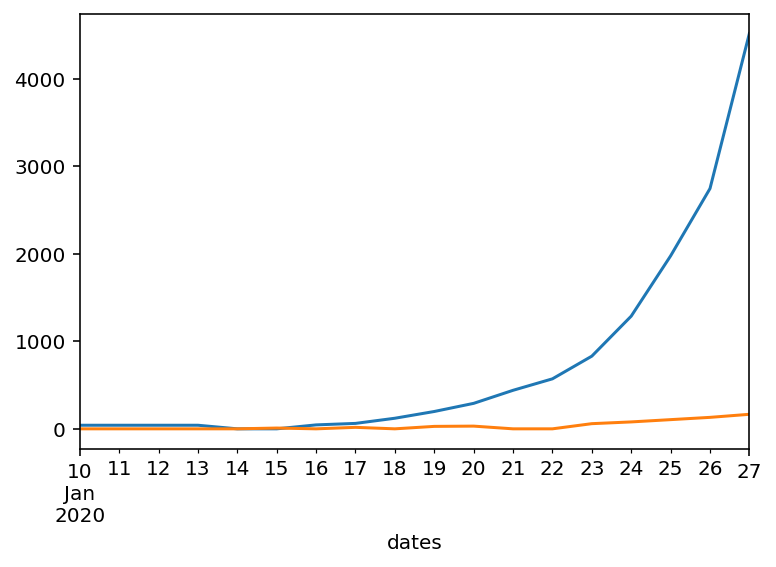

In [13]:
df.resample('D').sum().fillna(method='bfill').I.plot()
df.resample('D').sum().fillna(method='bfill').R.plot()

# Rationale

These data are from mainland china, which has a large popuation size.  Because the disease is in early stages, and because $N$ is so large, we can approximate $S(t) \approx N$.  The remaining differential equations are then

$$ I'(t) = (\b $$